## Introduction:
In the era of digital transformation, online reviews have become a powerful driving force influencing consumer choices and business reputation. Yelp, a prominent user-generated review platform, houses a vast repository of valuable insights encapsulated within millions of reviews. This project delves into the Yelp review dataset, employing data cleaning and natural language processing techniques to uncover hidden patterns and sentiments. By analyzing this rich textual data, we aim to assist businesses in understanding customer feedback, enhancing their services, and gaining an edge in an ever-competitive market. Let us embark on a journey of data exploration and sentiment analysis, revealing the untold story behind Yelp's myriad reviews.

## Motivation and Dataset Description:
Yelp is a popular online platform where users can provide reviews and ratings for businesses ranging from restaurants, cafes, and bars to local services and shops. The Yelp review dataset offers a wealth of information from millions of user-generated reviews, making it a valuable resource for conducting data-driven analyses and gaining insights into customer sentiments and behavior.

The primary motivation behind this project is to explore the Yelp review dataset and leverage natural language processing (NLP) techniques to uncover patterns, sentiments, and trends hidden within the vast volume of textual data. By harnessing NLP, we aim to extract valuable information from the reviews, such as sentiment polarity, key phrases, and common topics, that can aid businesses in understanding customer feedback and enhancing their services.

## Dataset Description:
The Yelp review dataset is a comprehensive collection of user reviews, encompassing multiple attributes such as user IDs, business IDs, review text, and star ratings. The dataset spans diverse geographical locations, businesses, and user demographics, providing a rich and varied set of reviews.

The main columns in the dataset include:

- `review_id`: A unique identifier for each review.
- `user_id`: The identifier of the user who wrote the review.
- `business_id`: The identifier of the business being reviewed.
- `stars`: The star rating given by the user (ranging from 1 to 5).
- `useful`, `funny`, `cool`: The counts of how many users marked the review as useful, funny, or cool.
- `text`: The textual content of the review.
- `date`: The date and time when the review was posted.

The dataset contains millions of reviews, making it a massive corpus of text that can be mined for valuable insights. However, like any real-world dataset, it also presents challenges, such as missing data, potential outliers, and the need for proper data cleaning and preprocessing.

By analyzing the Yelp review dataset, we aim to unravel patterns of user behavior, perform sentiment analysis to gauge customer sentiments, and contribute to a better understanding of user feedback on various businesses.

## Research Question
How well can sentiment analysis accurately predict the sentiment polarity of Yelp reviews compared to the user-provided star ratings?

In this study, we aim to employ Natural Language Processing (NLP) techniques, such as the VADER SentimentIntensityAnalyzer, to extract sentiment scores from the textual content of Yelp reviews. The research question focuses on comparing these sentiment scores with the star ratings assigned by users to assess the level of alignment between sentiment and rating.

Through this analysis, we seek to explore whether the extracted sentiments closely align with the star ratings or if there are instances of discrepancies. By validating the sentiment analysis against user ratings, we aim to gain insights into the efficacy of NLP methods for capturing sentiment from reviews and uncover any underlying patterns in the user feedback.

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import regex
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from langdetect import detect

#from langdetect import detect, DetectorFactory

## Get Data

In [2]:
# We used python to extract the data from the tar file and save it to a csv file in the /data folder
# tar file can be downloaded from here: https://www.yelp.com/dataset
try:
    reviews_df_raw = pd.read_csv('yelp_academic_dataset_review.csv')
    if reviews_df is not None:
        reviews_df = reviews_df_raw
except Exception as ex:
    print(ex, "\nTrying json")
    
try:
    reviews_df = pd.read_json('yelp_academic_dataset_review.json',lines=True, nrows = 50000)
except Exception as ex:
    print(ex)

[Errno 2] No such file or directory: 'yelp_academic_dataset_review.csv' 
Trying json


## Initial Exploratory Data Analysis

#### Lets look at the head of the dataframe to get an idea of the structure of the data

In [3]:
reviews_df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


#### By using the info method we can examine the number of rows and how many non-null entries we have in each column

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    50000 non-null  object        
 1   user_id      50000 non-null  object        
 2   business_id  50000 non-null  object        
 3   stars        50000 non-null  int64         
 4   useful       50000 non-null  int64         
 5   funny        50000 non-null  int64         
 6   cool         50000 non-null  int64         
 7   text         50000 non-null  object        
 8   date         50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 3.4+ MB


In [5]:
reviews_df.describe()

,stars,useful,funny,cool,date
count,50000.000000,50000.000000,50000.000000,50000.000000,50000
mean,3.848000,0.889540,0.250440,0.345060,2015-05-02 14:05:10.463060224
min,1.000000,0.000000,0.000000,0.000000,2005-03-01 17:47:15
25%,3.000000,0.000000,0.000000,0.000000,2013-12-07 15:24:53.750000128
50%,4.000000,0.000000,0.000000,0.000000,2015-09-27 19:03:58.500000
75%,5.000000,1.000000,0.000000,0.000000,2017-04-08 13:32:58
max,5.000000,91.000000,38.000000,49.000000,2018-10-04 18:22:35
std,1.350308,1.864481,0.941455,1.072388,NaN


#### Checking for null values in our columns

In [6]:
reviews_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

#### Checking for Duplicate reviews

In [7]:
duplicate_rows = reviews_df.duplicated().sum()
duplicate_review_text = reviews_df.duplicated(subset=['text']).sum()

print(f'Count of duplicate rows: {duplicate_rows}')
print(f'Count of duplicate review text: {duplicate_review_text}')

Count of duplicate rows: 0
Count of duplicate review text: 12


In [8]:
duplicate_review_text_df = reviews_df[reviews_df.duplicated(subset='text', keep=False)]
sorted_duplicate_review_text_df = duplicate_review_text_df.sort_values(by='text')
sorted_duplicate_review_text_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
34440,OZeQ85stc2Ior67axYrz1w,a-8_MHxPBzGiMRHbTL8TuA,5FuQbcHTF_I7PWJzhCMObw,3,0,0,0,Good Cheesesteaks but HORRIBLE service. I had ...,2016-03-06 21:28:49
32958,if53cBGTa91NHOqOH-ajWg,a-8_MHxPBzGiMRHbTL8TuA,5FuQbcHTF_I7PWJzhCMObw,2,1,0,0,Good Cheesesteaks but HORRIBLE service. I had ...,2016-03-09 22:39:51
47419,KR6Mr6BHmB3zuKvrAXfESw,ctyo_f1yNL0vU-4mC9fsIQ,C_EtrXTygRX5RTUOKtO6Dg,4,0,0,0,I gave up eating meat but I get cravings for b...,2016-03-11 22:50:40
28224,D1e8YSARvaTC7N6pxeNHhg,ctyo_f1yNL0vU-4mC9fsIQ,C_EtrXTygRX5RTUOKtO6Dg,4,0,0,0,I gave up eating meat but I get cravings for b...,2016-05-08 23:04:37
10053,ilrmAdE54JNCTHzCXXs9SA,SopKLh2Oho1ddTWhO5m3Cg,cXsrd3SqPh778u2yaiAslA,2,0,0,0,I was going to order delivery but the guy on t...,2018-05-29 00:32:11
19840,O2i7_7nojhHsjwK6-cVvrg,SopKLh2Oho1ddTWhO5m3Cg,cXsrd3SqPh778u2yaiAslA,2,0,0,0,I was going to order delivery but the guy on t...,2018-05-30 00:36:03
22920,Z9Oyh07XONpdCKN4WbGVDQ,QQOnyJ3osAgUFNafWfzNFw,kQRB8RNwd7cEMcURTS-I7A,4,0,0,0,I'm so excited that I don't have to drive into...,2016-05-07 17:19:11
26135,ufQua30foRur6HAAqEG2Nw,QQOnyJ3osAgUFNafWfzNFw,kQRB8RNwd7cEMcURTS-I7A,4,3,0,1,I'm so excited that I don't have to drive into...,2016-05-08 17:39:25
11305,NY8UWeooFGlwpFP0_auYxQ,xA1eoU2N9Z8XbkX81sPA2A,cRJIf2i9LX8X8DKDG2qjiQ,1,1,0,0,I'm very displeased with my experience here th...,2017-03-26 16:41:08
19616,6zWjE7aDAOUz94d3vwTRzg,xA1eoU2N9Z8XbkX81sPA2A,cRJIf2i9LX8X8DKDG2qjiQ,1,4,0,0,I'm very displeased with my experience here th...,2017-03-27 17:37:23


#### Dropping any duplicate reviews

In [9]:
reviews_df = reviews_df[~reviews_df.duplicated(["text"])]
len(reviews_df)

49988

Text(0, 0.5, 'Count')

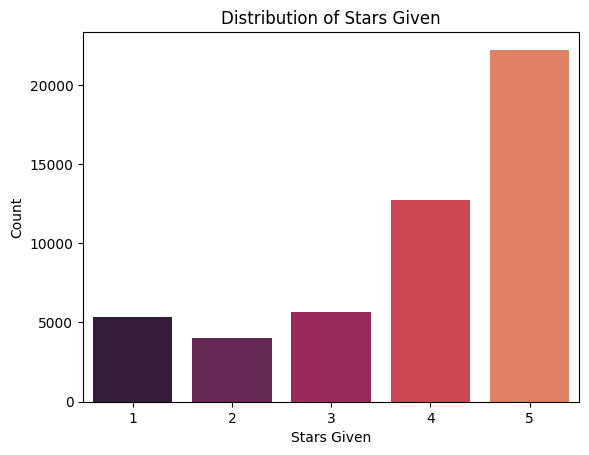

In [10]:
sns.set_palette('rocket')
sns.countplot(x = 'stars', data = reviews_df)
plt.title("Distribution of Stars Given")
plt.xlabel("Stars Given")
plt.ylabel("Count")

## Creating Wordclous

#### This first wordcloud is for all values of stars given

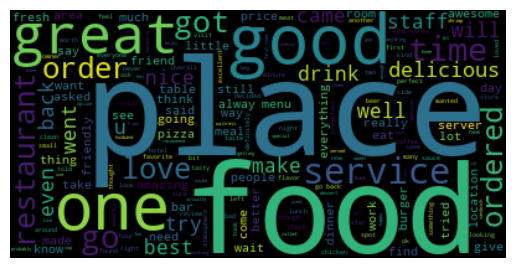

<Figure size 3000x2000 with 0 Axes>

In [11]:
stopwords = set(STOPWORDS)

all_words = " ".join(review for review in reviews_df['text'])
all_wc = WordCloud(stopwords = stopwords).generate(all_words)

plt.imshow(all_wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize = (30,20))
plt.show()

#### This wordlcoud is for only 5 star reviews

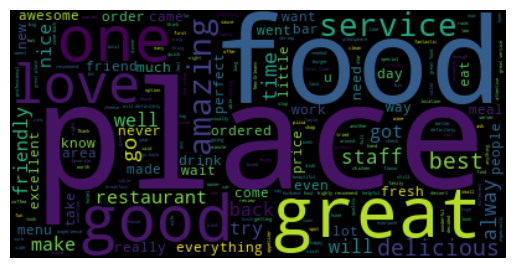

In [12]:
five_df = reviews_df[reviews_df['stars'] == 5]
five_df.head()
five_words = " ".join(review for review in five_df['text'])
five_wc = WordCloud(stopwords = stopwords).generate(five_words)
plt.imshow(five_wc, interpolation='bilinear')
plt.axis("off")

plt.show()

#### Next we looked at a wordcloud for 3 star reviews

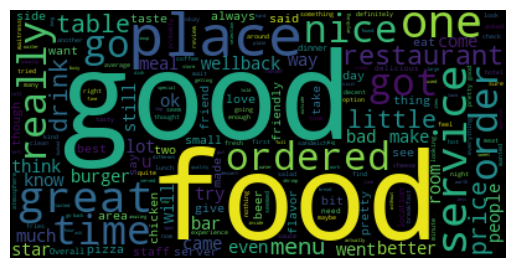

In [13]:
three_df = reviews_df[reviews_df['stars'] == 3]

three_words = " ".join(review for review in three_df['text'])
three_wc = WordCloud(stopwords = stopwords).generate(three_words)
plt.imshow(three_wc, interpolation='bilinear')
plt.axis("off")

plt.show()

### Last we can compare those to one star reviews

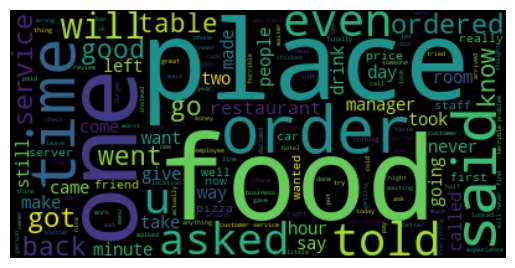

In [14]:
one_df = reviews_df[reviews_df['stars'] == 1]

one_words = " ".join(review for review in one_df['text'])
one_wc = WordCloud(stopwords = stopwords).generate(one_words)
plt.imshow(one_wc, interpolation='bilinear')
plt.axis("off")

plt.show()

In [15]:
# We drop these columns here, but down below, they are necessary for the heatmap

feature_df = reviews_df.drop(['stars','text', 'business_id', 'review_id', 'user_id','date'], axis=1)
label_df = reviews_df['stars'].copy()

In [16]:
corr_matrix = reviews_df.corr()
print(corr_matrix)

ValueError: could not convert string to float: 'KU_O5udG6zpxOg-VcAEodg'

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE: ', rmse)

In [ ]:
import matplotlib.pyplot as plt

print("Logistic Regression Confusion Matrix:")
lr_confuse = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_confuse, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeRegressor()
tree_score = cross_val_score(tree_model, feature_df, label_df, cv=5, scoring='neg_mean_squared_error')
tree_rmse = np.sqrt(-tree_score)

print("Root Mean: ", tree_rmse.mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, feature_df, label_df, cv=5, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores)

print("Root Mean: ", rf_rmse.mean())

In [ ]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

X = x_train
y = y_train

estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name

## Natural Language Processing

In [ ]:
cols_to_drop =["review_id", "user_id", "useful", "funny", "cool", "date"]
reviews_df.drop(cols_to_drop, inplace= True, axis=1)
reviews_df.head()

In [ ]:
# This takes over an hour to run

# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'
# DetectorFactory.seed = 0
# reviews_df['language'] = reviews_df['text'].apply(detect_language)
# reviews_df = reviews_df[reviews_df['language'] == 'en']

reviews_df['text'] = reviews_df['text'].replace(r'\n', ' ', regex=True)

In [ ]:
def isEnglish(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True
reviews_df['language'] = reviews_df['text'].apply(isEnglish)

reviews_df.sample(20)

In [ ]:
reviews_df[reviews_df['language'] == False].count

In [ ]:
reviews_df[reviews_df['language'] == True].count

In [ ]:
reviews_df = reviews_df[reviews_df['language'] == True]

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
scores = []
for i in range(len(reviews_df)):
    # get the text in the review
    sentence = reviews_df.iloc[i][2].strip()
    # tokenize the text
    tokens = word_tokenize(sentence.lower())
    tokens = [x for x in tokens if x not in stopwords.words('english') and x.isalpha()]
    # lematize the tokens
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(x) for x in tokens]
    final_text = ' '.join(tokens)
    # analyze the sentence
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(final_text)
    scores.append(score)

In [ ]:
scores_df = pd.DataFrame(scores)
scores_df.head(10)

In [ ]:
new_df = pd.concat([reviews_df, scores_df], axis=1) 
new_df